<a href="https://colab.research.google.com/github/Tonry12/Data_joyx2/blob/main/lotterry_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Data

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle

In [3]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
lotto = pd.read_csv('/content/drive/MyDrive/SPN/Predictive lottery.xlsx - since 30 years ago.csv')

In [5]:
lotto = lotto.drop(columns=['Date','Unnamed: 1','Unnamed: 2','Unnamed: 3'])

In [6]:
lotto

,DATE,รางวัลที่ 1,2 ตัวบน,3 ตัวบน,2 ตัวล่าง,3 ตัวหน้า,3 ตัวหน้า.1,3 ตัวล่าง,3 ตัวล่าง.1,weekday_dum,weekday
0,5/1/2024,980116,16,116,17,104,763,634,833,4,Wednesday
1,4/16/2024,943598,98,598,79,727,729,154,200,3,Tuesday
2,4/1/2024,803481,81,481,90,122,809,559,947,2,Monday
3,3/16/2024,997626,26,626,78,509,571,329,794,7,Saturday
4,3/1/2024,253603,3,603,79,900,975,382,703,6,Friday
...,...,...,...,...,...,...,...,...,...,...,...
716,5/16/1994,2071764,64,764,29,93,544,535,746,2,Monday
717,5/2/1994,3072877,77,877,69,535,317,170,521,2,Monday
718,4/16/1994,7893913,13,913,21,785,982,151,594,7,Saturday
719,4/1/1994,4269815,15,815,29,675,35,704,868,6,Friday


In [7]:
lotto.isnull().any()

DATE           False
รางวัลที่ 1    False
2 ตัวบน        False
3 ตัวบน        False
2 ตัวล่าง      False
3 ตัวหน้า      False
3 ตัวหน้า.1    False
3 ตัวล่าง      False
3 ตัวล่าง.1    False
weekday_dum    False
weekday        False
dtype: bool

In [8]:
lotto.rename(columns={'DATE': 'Date','รางวัลที่ 1': '1st','3 ตัวบน':'top3','2 ตัวล่าง':'up2'},inplace=True)

In [9]:
lotto

,Date,1st,2 ตัวบน,top3,up2,3 ตัวหน้า,3 ตัวหน้า.1,3 ตัวล่าง,3 ตัวล่าง.1,weekday_dum,weekday
0,5/1/2024,980116,16,116,17,104,763,634,833,4,Wednesday
1,4/16/2024,943598,98,598,79,727,729,154,200,3,Tuesday
2,4/1/2024,803481,81,481,90,122,809,559,947,2,Monday
3,3/16/2024,997626,26,626,78,509,571,329,794,7,Saturday
4,3/1/2024,253603,3,603,79,900,975,382,703,6,Friday
...,...,...,...,...,...,...,...,...,...,...,...
716,5/16/1994,2071764,64,764,29,93,544,535,746,2,Monday
717,5/2/1994,3072877,77,877,69,535,317,170,521,2,Monday
718,4/16/1994,7893913,13,913,21,785,982,151,594,7,Saturday
719,4/1/1994,4269815,15,815,29,675,35,704,868,6,Friday


In [10]:
ls= lotto.iloc[:,9:11]

In [11]:
lu= lotto.iloc[:,0:5]

In [12]:
lt = pd.concat([lu, ls], axis=1)

In [13]:
lt

,Date,1st,2 ตัวบน,top3,up2,weekday_dum,weekday
0,5/1/2024,980116,16,116,17,4,Wednesday
1,4/16/2024,943598,98,598,79,3,Tuesday
2,4/1/2024,803481,81,481,90,2,Monday
3,3/16/2024,997626,26,626,78,7,Saturday
4,3/1/2024,253603,3,603,79,6,Friday
...,...,...,...,...,...,...,...
716,5/16/1994,2071764,64,764,29,2,Monday
717,5/2/1994,3072877,77,877,69,2,Monday
718,4/16/1994,7893913,13,913,21,7,Saturday
719,4/1/1994,4269815,15,815,29,6,Friday


In [14]:
lt = lt.drop(columns=['2 ตัวบน'])

In [15]:
lt

,Date,1st,top3,up2,weekday_dum,weekday
0,5/1/2024,980116,116,17,4,Wednesday
1,4/16/2024,943598,598,79,3,Tuesday
2,4/1/2024,803481,481,90,2,Monday
3,3/16/2024,997626,626,78,7,Saturday
4,3/1/2024,253603,603,79,6,Friday
...,...,...,...,...,...,...
716,5/16/1994,2071764,764,29,2,Monday
717,5/2/1994,3072877,877,69,2,Monday
718,4/16/1994,7893913,913,21,7,Saturday
719,4/1/1994,4269815,815,29,6,Friday


In [16]:
lt.dtypes

Date           object
1st             int64
top3            int64
up2             int64
weekday_dum     int64
weekday        object
dtype: object

In [17]:
more = lt[lt['1st'] >= 999999]
more.count()

Date           20
1st            20
top3           20
up2            20
weekday_dum    20
weekday        20
dtype: int64

In [18]:
lt = lt[lt['1st'] <= 999999]

In [19]:
lt['up2'] = lt['up2'].apply(lambda x: '{:02}'.format(x))

In [20]:
lt['top3'] = lt['top3'].apply(lambda x: '{:03}'.format(x))

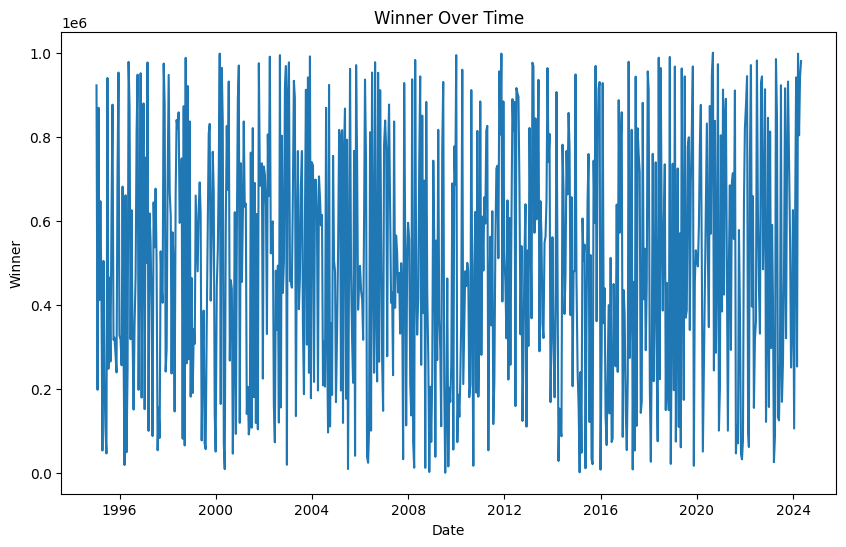

In [21]:
lt['Date'] = pd.to_datetime(lt['Date'])
plt.figure(figsize=(10,6))
plt.plot(lt['Date'], lt['1st'])
plt.title('Winner Over Time')
plt.xlabel('Date')
plt.ylabel('Winner')

plt.show()

<Axes: ylabel='1st'>

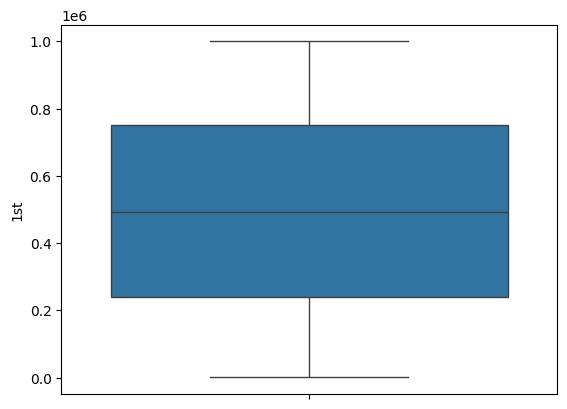

In [22]:
sns.boxplot(data=lt['1st'])

<Axes: ylabel='top3'>

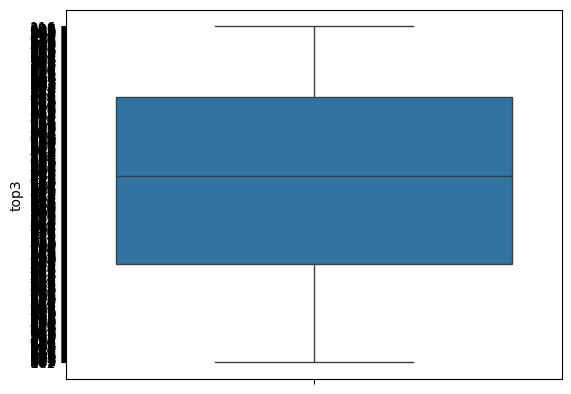

In [23]:
sns.boxplot(data=lt['top3'])

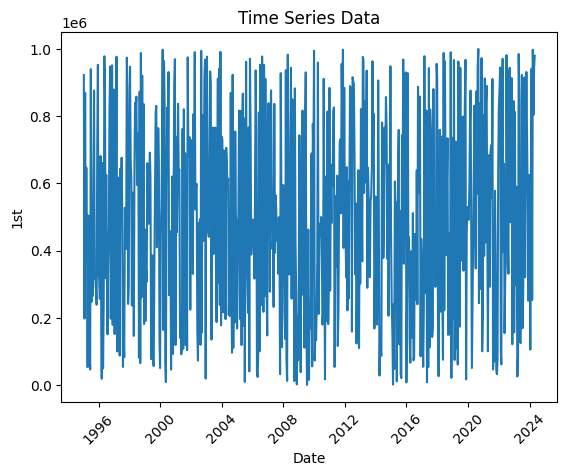

In [24]:
# Plot the time-series data
plt.plot(lt['Date'], lt['1st'])
plt.xlabel('Date')
plt.ylabel('1st')
plt.xticks(rotation = 45)
plt.title('Time Series Data')
plt.show()

In [25]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg

# Create and fit the AR model
model = AutoReg(lt['1st'], lags=1)
ar_model = model.fit()

# Make predictions
predictions = ar_model.predict(start=len(lt), end=len(lt)+3)  # Replace 3 with the number of future values to predict

print(predictions)


701    480915.871005
702    497225.550477
703    496623.008149
704    496645.268382
dtype: float64


## Split Date

In [26]:
lt['Year'] = pd.to_datetime(lt['Date']).dt.year
lt['Month'] = pd.to_datetime(lt['Date']).dt.month
lt['Day'] = pd.to_datetime(lt['Date']).dt.day

In [27]:
lt_1 = lt

In [28]:
lt_1['up2'] = lt_1['up2'].astype(str)

# Split each value in the 'digi' column into its individual digits
lt_1['Tens digit'] = lt_1['up2'].apply(lambda x: int(x[0]))
lt_1['Units digit'] = lt_1['up2'].apply(lambda x: int(x[1]) if len(x) > 1 else 0)

In [29]:
lt_1['top3'] = lt_1['top3'].astype(str)

# Split each value in the 'digi' column into its individual digits
lt_1['c3_r1'] = lt_1['top3'].apply(lambda x: int(x[0]))
lt_1['c3_r2'] = lt_1['top3'].apply(lambda x: int(x[1]))
lt_1['c3_r3'] = lt_1['top3'].apply(lambda x: int(x[2]))

In [30]:
lt_1

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-05-01,980116,116,17,4,Wednesday,2024,5,1,1,7,1,1,6
1,2024-04-16,943598,598,79,3,Tuesday,2024,4,16,7,9,5,9,8
2,2024-04-01,803481,481,90,2,Monday,2024,4,1,9,0,4,8,1
3,2024-03-16,997626,626,78,7,Saturday,2024,3,16,7,8,6,2,6
4,2024-03-01,253603,603,79,6,Friday,2024,3,1,7,9,6,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,1995-03-16,646847,847,67,5,Thursday,1995,3,16,6,7,8,4,7
697,1995-03-01,411454,454,71,4,Wednesday,1995,3,1,7,1,4,5,4
698,1995-02-16,869070,070,95,5,Thursday,1995,2,16,9,5,0,7,0
699,1995-02-01,198162,162,48,4,Wednesday,1995,2,1,4,8,1,6,2


## เลือกแค่ 3 ปีย้อนหลัง

In [31]:
three_y = lt[lt['Date'] >= '2021-01-01']
three_y

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-05-01,980116,116,17,4,Wednesday,2024,5,1,1,7,1,1,6
1,2024-04-16,943598,598,79,3,Tuesday,2024,4,16,7,9,5,9,8
2,2024-04-01,803481,481,90,2,Monday,2024,4,1,9,0,4,8,1
3,2024-03-16,997626,626,78,7,Saturday,2024,3,16,7,8,6,2,6
4,2024-03-01,253603,603,79,6,Friday,2024,3,1,7,9,6,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2021-03-16,890422,422,19,3,Tuesday,2021,3,16,1,9,4,2,2
76,2021-03-01,835538,538,73,2,Monday,2021,3,1,7,3,5,3,8
77,2021-02-16,424603,603,39,3,Tuesday,2021,2,16,3,9,6,0,3
78,2021-02-01,912307,307,97,2,Monday,2021,2,1,9,7,3,0,7


In [32]:
grouped_counts = three_y.groupby('up2').size().reset_index(name='Count')
grouped_counts

,up2,Count
0,02,1
1,03,1
2,05,1
3,06,1
4,07,1
5,08,1
6,09,3
7,10,1
8,11,1
9,14,4


In [33]:
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,up2,Count
9,14,4


In [34]:
three_y['up2_2'] = three_y['up2'].astype(str)

In [35]:
three_y['up2'] = three_y['up2'].astype(str)

# Split each value in the 'digi' column into its individual digits
three_y['Tens digit'] = three_y['up2'].apply(lambda x: int(x[0]))
three_y['Units digit'] = three_y['up2'].apply(lambda x: int(x[1]) if len(x) > 1 else 0)

In [36]:
three_y['top3'] = three_y['top3'].astype(str)

# Split each value in the 'digi' column into its individual digits
three_y['c3_r1'] = three_y['top3'].apply(lambda x: int(x[0]))
three_y['c3_r2'] = three_y['top3'].apply(lambda x: int(x[1]))
three_y['c3_r3'] = three_y['top3'].apply(lambda x: int(x[2]))

In [37]:
three_y

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3,up2_2
0,2024-05-01,980116,116,17,4,Wednesday,2024,5,1,1,7,1,1,6,17
1,2024-04-16,943598,598,79,3,Tuesday,2024,4,16,7,9,5,9,8,79
2,2024-04-01,803481,481,90,2,Monday,2024,4,1,9,0,4,8,1,90
3,2024-03-16,997626,626,78,7,Saturday,2024,3,16,7,8,6,2,6,78
4,2024-03-01,253603,603,79,6,Friday,2024,3,1,7,9,6,0,3,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2021-03-16,890422,422,19,3,Tuesday,2021,3,16,1,9,4,2,2,19
76,2021-03-01,835538,538,73,2,Monday,2021,3,1,7,3,5,3,8,73
77,2021-02-16,424603,603,39,3,Tuesday,2021,2,16,3,9,6,0,3,39
78,2021-02-01,912307,307,97,2,Monday,2021,2,1,9,7,3,0,7,97


In [38]:
three_y = three_y.drop(columns=['up2_2'])

In [39]:
three_y

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-05-01,980116,116,17,4,Wednesday,2024,5,1,1,7,1,1,6
1,2024-04-16,943598,598,79,3,Tuesday,2024,4,16,7,9,5,9,8
2,2024-04-01,803481,481,90,2,Monday,2024,4,1,9,0,4,8,1
3,2024-03-16,997626,626,78,7,Saturday,2024,3,16,7,8,6,2,6
4,2024-03-01,253603,603,79,6,Friday,2024,3,1,7,9,6,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2021-03-16,890422,422,19,3,Tuesday,2021,3,16,1,9,4,2,2
76,2021-03-01,835538,538,73,2,Monday,2021,3,1,7,3,5,3,8
77,2021-02-16,424603,603,39,3,Tuesday,2021,2,16,3,9,6,0,3
78,2021-02-01,912307,307,97,2,Monday,2021,2,1,9,7,3,0,7


### หาค่าซ้ำเลขท้าย 2 ตัวหลักที่ 1

In [40]:
grouped_counts = three_y.groupby('Tens digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Tens digit,Count
1,1,13


### หาค่าซ้ำเลขท้าย 2 ตัวหลักที่ 2

In [41]:
grouped_counts = three_y.groupby('Units digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Units digit,Count
9,9,13


### สรุปเลขท้าย 2 ของข้อมูล 3 ปีย้อนหลังทั้งหมด
- ตัวที่ซ้ำกันมากที่สุดคือ 14
- หลักแรกคือ 1 หลักที่2 คือ 9
- ดังนั้นเลขที่จะออกคือ 14 และ 19

# 6 ปีย้อนหลัง group by Thursday



In [42]:
six_y = lt[lt['Date'] >= '2018-01-01']
six_y

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-05-01,980116,116,17,4,Wednesday,2024,5,1,1,7,1,1,6
1,2024-04-16,943598,598,79,3,Tuesday,2024,4,16,7,9,5,9,8
2,2024-04-01,803481,481,90,2,Monday,2024,4,1,9,0,4,8,1
3,2024-03-16,997626,626,78,7,Saturday,2024,3,16,7,8,6,2,6
4,2024-03-01,253603,603,79,6,Friday,2024,3,1,7,9,6,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2018-03-16,218559,559,82,6,Friday,2018,3,16,8,2,5,5,9
145,2018-03-02,759415,415,29,6,Friday,2018,3,2,2,9,4,1,5
146,2018-02-16,309915,915,39,6,Friday,2018,2,16,3,9,9,1,5
147,2018-02-01,26853,853,31,5,Thursday,2018,2,1,3,1,8,5,3


In [43]:
Th = six_y[six_y['weekday'] == "Thursday"]

In [44]:
Th.count()

Date           23
1st            23
top3           23
up2            23
weekday_dum    23
weekday        23
Year           23
Month          23
Day            23
Tens digit     23
Units digit    23
c3_r1          23
c3_r2          23
c3_r3          23
dtype: int64

In [45]:
# เลขท้าย 2 ตัวที่ออกบ่อยที่สุด
grouped_counts = Th.groupby('up2').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,up2,Count
2,09,2
11,58,2
17,83,2


In [46]:
# เลขท้ายสองตัวหลักที่ 1 ที่ออกบ่อยสุด
grouped_counts = Th.groupby('Tens digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Tens digit,Count
4,5,5


In [47]:
# เลขท้ายสองตัวหลักที่ 2 ที่ออกบ่อยสุด
grouped_counts = Th.groupby('Units digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Units digit,Count
3,3,4
9,9,4


### สรุปเลขท้าย 2 ของงวดวันพฤหัส 6 ปีย้อนหลัง
- ตัวที่ซ้ำกันมากที่สุดคือ 09 58 83 ทั้งหมด
- หลักที่1 คือ 5 หลักที่2 คือ 3 และ 9
- ดังนั้นเลขที่จะออกคือ 09, 58, 83, 53 และอาจจะออก 59

# ทำนายงวด 16 พฤษภาคม

## เลขท้าย 2 ตัว

In [48]:
may_16 = lt_1[(lt_1['Month'] == 5) & (lt_1['Day'] == 16)]
may_16

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
23,2023-05-16,132903,903,99,3,Tuesday,2023,5,16,9,9,9,0,3
47,2022-05-16,155012,012,06,2,Monday,2022,5,16,0,6,0,1,2
71,2021-05-16,684579,579,14,1,Sunday,2021,5,16,1,4,5,7,9
116,2019-05-16,962526,526,71,5,Thursday,2019,5,16,7,1,5,2,6
140,2018-05-16,75629,629,20,4,Wednesday,2018,5,16,2,0,6,2,9
164,2017-05-16,454891,891,53,3,Tuesday,2017,5,16,5,3,8,9,1
188,2016-05-16,141737,737,98,2,Monday,2016,5,16,9,8,7,3,7
212,2015-05-16,11421,421,38,7,Saturday,2015,5,16,3,8,4,2,1
236,2014-05-16,87523,523,20,6,Friday,2014,5,16,2,0,5,2,3
260,2013-05-16,687125,125,56,5,Thursday,2013,5,16,5,6,1,2,5


In [49]:
# เลขท้าย 2 ตัวที่ออกบ่อยที่สุด
grouped_counts = may_16.groupby('up2').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,up2,Count
6,20,3


In [50]:
# เลขท้ายสองตัวหลักที่ 1 ที่ออกบ่อยสุด
grouped_counts = may_16.groupby('Tens digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Tens digit,Count
4,5,5


In [51]:
# เลขท้ายสองตัวหลักที่ 2 ที่ออกบ่อยสุด
grouped_counts = may_16.groupby('Units digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Units digit,Count
6,6,5


In [52]:
# งวดปีล่าสุด
may_16[(may_16['Year'] == 2023)]

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
23,2023-05-16,132903,903,99,3,Tuesday,2023,5,16,9,9,9,0,3


### สรุปเลขท้าย 2 ของงวดวันที่ 16-May 30 ปีย้อนหลัง
- ตัวที่ซ้ำกันมากที่สุดคือ 20 ทั้งหมด
- หลักที่1 คือ 5 หลักที่2 คือ 6
- งวดล่าสุดของปีที่แล้วคือ 99
- ดังนั้นเลขที่จะออกคือ 20, 56 และอาจจะออก 99

## เลขท้าย 3 ตัว

In [53]:
# เลขท้าย 3 ตัวที่ออกบ่อยที่สุด
grouped_counts = may_16.groupby('top3').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,top3,Count
0,012,2


In [54]:
# เลขท้ายสามตัวหลักที่ 1 ที่ออกบ่อยสุด
grouped_counts = may_16.groupby('c3_r1').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,c3_r1,Count
0,0,4
4,4,4


In [55]:
# เลขท้ายสามตัวหลักที่ 2 ที่ออกบ่อยสุด
grouped_counts = may_16.groupby('c3_r2').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,c3_r2,Count
1,1,8


In [56]:
# เลขท้ายสามตัวหลักที่ 3 ที่ออกบ่อยสุด
grouped_counts = may_16.groupby('c3_r3').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,c3_r3,Count
6,7,5


### สรุปเลขท้าย 3 ของงวดวันที่ 16-May 30 ปีย้อนหลัง
- ตัวที่ซ้ำกันมากที่สุดคือ 012 ทั้งหมด
- หลักที่1 คือ 0,4 หลักที่2 คือ 1 หลักที่3 คือ 7
- งวดล่าสุดของปีที่แล้วคือ 903
- ดังนั้นเลขที่จะออกคือ 012 และ
  017 หรือ 417 และอาจจะออก 903

# ตรวจสอบความแม่น โดยทำนายงวดที่ 1 พฤษภา 30ปีย้อนหลัง

## เลขท้าย 2 ตัว

In [57]:
may_2 = lt_1[(lt_1['Month'] == 5) & (lt_1['Day'] == 2)]
may_2

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
24,2023-05-02,843019,019,65,3,Tuesday,2023,5,2,6,5,0,1,9
48,2022-05-02,658642,642,09,2,Monday,2022,5,2,0,9,6,4,2
72,2021-05-02,501272,272,18,1,Sunday,2021,5,2,1,8,2,7,2
117,2019-05-02,61324,324,25,5,Thursday,2019,5,2,2,5,3,2,4
141,2018-05-02,248038,038,85,4,Wednesday,2018,5,2,8,5,0,3,8
165,2017-05-02,8656,656,35,3,Tuesday,2017,5,2,3,5,6,5,6
189,2016-05-02,399459,459,02,2,Monday,2016,5,2,0,2,4,5,9
213,2015-05-02,543466,466,30,7,Saturday,2015,5,2,3,0,4,6,6
237,2014-05-02,103297,297,52,6,Friday,2014,5,2,5,2,2,9,7
261,2013-05-02,603458,458,07,5,Thursday,2013,5,2,0,7,4,5,8


In [58]:
# เลขท้าย 2 ตัวที่ออกบ่อยที่สุด
grouped_counts = may_2.groupby('up2').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,up2,Count
24,85,2


In [59]:
# เลขท้ายสองตัวหลักที่ 1 ที่ออกบ่อยสุด
grouped_counts = may_2.groupby('Tens digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Tens digit,Count
0,0,4
2,2,4
8,8,4


In [60]:
# เลขท้ายสองตัวหลักที่ 2 ที่ออกบ่อยสุด
grouped_counts = may_2.groupby('Units digit').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,Units digit,Count
5,5,6


In [61]:
# งวดปีล่าสุด
may_2[(may_2['Year'] == 2023)]

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
24,2023-05-02,843019,019,65,3,Tuesday,2023,5,2,6,5,0,1,9


### สรุปเลขท้าย 2 ของงวดวันที่ 16-May 30 ปีย้อนหลัง
- ตัวที่ซ้ำกันมากที่สุดคือ 85 ทั้งหมด
- หลักที่1 คือ 0 2 8 หลักที่2 คือ 5
- งวดล่าสุดของปีที่แล้วคือ 65
- ดังนั้นเลขที่จะออกคือ 85, 05, 25, 85 และอาจจะออก 65

In [62]:
# ประเมินผล model ว่าออกจริงมั้ย
lt_1[(lt_1['Month'] == 5) & (lt_1['Day'] == 1)]

,Date,1st,top3,up2,weekday_dum,weekday,Year,Month,Day,Tens digit,Units digit,c3_r1,c3_r2,c3_r3
0,2024-05-01,980116,116,17,4,Wednesday,2024,5,1,1,7,1,1,6


## เลขท้าย 3 ตัว

In [63]:
# เลขท้ายสามตัวหลักที่ 1 ที่ออกบ่อยสุด
grouped_counts = may_2.groupby('c3_r1').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,c3_r1,Count
4,4,8


In [64]:
# เลขท้ายสามตัวหลักที่ 2 ที่ออกบ่อยสุด
grouped_counts = may_2.groupby('c3_r2').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,c3_r2,Count
5,5,6


In [65]:
# เลขท้ายสามตัวหลักที่ 3 ที่ออกบ่อยสุด
grouped_counts = may_2.groupby('c3_r3').size().reset_index(name='Count')
max_count_row = grouped_counts[grouped_counts['Count'] == grouped_counts['Count'].max()]
max_count_row

,c3_r3,Count
0,1,4
1,2,4
3,4,4
6,7,4


# พยากรณ์ล่วงหน้า 1 งวด